In [1]:
from preprocessing import read_data,data_with_sparse_matrix
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import gensim
import warnings
import torch
import re
import underthesea
warnings.filterwarnings('ignore')
from string import punctuation
punctuation = punctuation + '‘’“”'


In [4]:
np.sum([-1,0,0,0,0,1,1,0,0,0,0,0])

1

In [2]:
train_data_raw = read_data('Dataset_For_Work\\1-VLSP2018-SA-Hotel-train (7-3-2018).txt')
test_data_raw = read_data('Dataset_For_Work\\2-VLSP2018-SA-Hotel-dev (7-3-2018).txt')
valid_data_raw = read_data('Dataset_For_Work\\3-VLSP2018-SA-Hotel-test (8-3-2018).txt')

In [8]:
test_data_raw['review'].to_csv('te.csv')

In [9]:
print(len(train_data_raw),len(test_data_raw),len(valid_data_raw))

3000 2000 600


In [10]:
print(len(train_data_raw) + len(test_data_raw) + len(valid_data_raw))

5600


In [11]:
train_data_after_adding_label,_ = data_with_sparse_matrix(train_data_raw)
test_data_after_adding_label,_ = data_with_sparse_matrix(test_data_raw)
valid_data_after_adding_label,_ = data_with_sparse_matrix(valid_data_raw)

In [13]:
train_data_after_adding_label.head(10)

,Text,Label
0,Rộng rãi KS mới nhưng rất vắng. Các dịch vụ ch...,0
1,"Địa điểm thuận tiện, trong vòng bán kính 1,5km...",0
2,"Phục vụ, view đẹp, vị trí",1
3,"thuận tiện , sạch sẽ , vui vẻ hài lòng",1
4,Vị trí đẹp; Có quán bar view đẹp; Nhân viên th...,1
5,- Co view huong Ho tay- sach se-nhan vien tan ...,1
6,"Phòng ốc sạch, giường thoải mái, nhân viên thâ...",1
7,"gần Hồ Tây, view nhìn ra hồ lãng mạn, đi bộ dọ...",1
8,Hình thức không thể quyết định nội dung.H&atil...,0
9,Tôi ở đây lần này là lần thứ 4. Khi nhận phòng...,-1


In [14]:
train_data_after_adding_label.Text.values

array(['Rộng rãi KS mới nhưng rất vắng. Các dịch vụ chất lượng chưa cao và thiếu.',
       'Địa điểm thuận tiện, trong vòng bán kính 1,5km nhiều quán ăn ngon',
       'Phục vụ, view đẹp, vị trí', ...,
       'Xin chào Chudu24,Xin cám ơn dịch vụ booking của Chudu24 đã cho vợ chồng tôi có một kỳ nghỉ yên tâm, tin tưởng và thật thoải mái. ôi xin có một số đánh giá sau đây về Sapa View hotel:1. Phòng Deluxe garden view: Phòng sạch sẽ, tiện nghi, yên tĩnh, gần trung tâm và đặc biệt view rất đẹp nhìn xuống thung lũng với ruộng bậc thang mênh mông cùng với balcony rất ấn tượng cùng giỏ hoa mầu sắc. Do ở HN chỉ có điều hòa 2 chiều nên khi ở đó mình được trải nhiệm với lò sưởi bằng củi rất đặc trưng Sapa. Buổi tối ngồi bàn đôi cạnh lò sưởi cùng ánh nến ấm áp và li rượu vang thật là tuyệt vời ông mặt zời. 2. Phục vụ: Nhân viên phục vụ là mấy em người Mông nên rất là thật thà, chu đáo. Theo quy định 2h mới được nhận phòng nhưng do đến SaPa lúc 8AM bà chủ Sapa View đã chào đón niềm nở và cho nhận 

In [15]:
#clean_train_data_raw = pd.read_csv(clean_train_data_raw.csv)

In [16]:
def process_data(data):
    sentences = []
    stop_words = open('Dataset_For_Work\\vietnamese-stopwords.txt','r',encoding='utf-8').read().split('\n')
    for item in data:
        processed_item = item.lower()
        # for s_t in stop_words:

        #     processed_item = re.sub(rf" {s_t} ", ' ', processed_item)

        processed_item = re.sub(f'[{punctuation}]',' ',processed_item)
        processed_item = re.sub(f'\s+',' ',processed_item)
        temp = underthesea.sent_tokenize(processed_item)
        sentences += temp

    tokenize_data = [underthesea.word_tokenize(i) for i in sentences]

    return tokenize_data, sentences

In [17]:
token_train,sentences_train = process_data(train_data_after_adding_label.Text.values)
token_test,sentences_test = process_data(test_data_after_adding_label.Text.values)    
token_valid,sentences_valid = process_data(valid_data_after_adding_label.Text.values)

In [18]:
token_train[88]

['trang thiết bị',
 'trong',
 'phòng không',
 'tốt',
 'lắm',
 'tivi',
 'vẫn',
 'còn',
 'sử dụng',
 'model',
 'đời',
 'cũ',
 'tiêu chuẩn',
 'như',
 '3',
 'sao',
 'thì',
 'tv',
 'phải',
 'sử dụng',
 'lcd',
 'nhân viên',
 'tiếp tân',
 'chưa',
 'tư vấn',
 'cho',
 'khách',
 'nhiệt tình',
 'về',
 'các',
 'dịch vụ',
 'và',
 'khuyến mại',
 'của',
 'khách sạn']

In [19]:
# clean_train_data_raw

In [20]:
def process_data2(data):
    data_doc = []
    stop_words = open('Dataset_For_Work\\vietnamese-stopwords.txt','r',encoding='utf-8').read().split('\n')
    for item in data:
        processed_item = item.lower()
        # for s_t in stop_words:
        #     processed_item = re.sub(rf" {s_t} ", ' ', processed_item)
        processed_item = re.sub(f'[{punctuation}]',' ',processed_item)
        processed_item = re.sub(f'\s+',' ',processed_item)
        temp = underthesea.sent_tokenize(processed_item)
        tokenize_data = []
        for i in temp:
          tokenize_data += underthesea.word_tokenize(i)
        data_doc.append(tokenize_data)
    return data_doc

In [21]:
process_train_data_raw = process_data2(train_data_after_adding_label.Text.values)
process_test_data_raw = process_data2(test_data_after_adding_label.Text.values)
process_valid_data_raw = process_data2(valid_data_after_adding_label.Text.values)

In [22]:
process_train_data_raw[88]

['trang thiết bị',
 'trong',
 'phòng không',
 'tốt',
 'lắm',
 'tivi',
 'vẫn',
 'còn',
 'sử dụng',
 'model',
 'đời',
 'cũ',
 'tiêu chuẩn',
 'như',
 '3',
 'sao',
 'thì',
 'tv',
 'phải',
 'sử dụng',
 'lcd',
 'nhân viên',
 'tiếp tân',
 'chưa',
 'tư vấn',
 'cho',
 'khách',
 'nhiệt tình',
 'về',
 'các',
 'dịch vụ',
 'và',
 'khuyến mại',
 'của',
 'khách sạn']

In [23]:
def convert_data_to_vector(data,model,max_length):

    vector_data = []
    for item in data:
        temp = []
        for word in item:
            try:
                temp.append(model.wv.get_vector(word))
            except KeyError:
                print(word)
                print('Từ này không có trong từ điển :))')
                continue
        
        # Padding câhu để đồng nhất kích thước của vector, phục vụ cho quá trình train
        while len(temp) < max_length:
            temp.append(np.zeros(model.wv.vector_size))  # Thêm vector 0
        
        # Cắt bớt nếu câu dài hơn max_length
        temp = temp[:max_length]
        
        vector_data.append(np.array(temp))
    
    # Chuyển embedding vector sang Tensor
    vector_data = np.array(vector_data) 
    return torch.tensor(vector_data, dtype=torch.float32) # (batch_size, max_length, embedding_dim)


#Tensor chứa list các vector câu 
#Kích thước cảu Tensor là (số lượng câu,kích thước của 1 câu,số chiều của vector embedding)
#Ví dụ có câu #Tôi đi học
#Tensor có dạng
#[[vector tôi],[vector đi],[vector học]]

In [24]:
MAX_LENGTH = 150 #số từ tối đa trong vector câu là 150

In [25]:
w2v_model = gensim.models.Word2Vec(sentences=token_train + token_test + token_valid,
                               min_count=1,
                               vector_size=128,
                               alpha=0.001,
                               window=5,
                               epochs=5000,
                               )

In [26]:
from torch.utils.data import DataLoader, TensorDataset

In [12]:
# Chuyển đổi x_train và x_test sang vector rồi padding
x_train_vector = convert_data_to_vector(data=process_train_data_raw, model=w2v_model, max_length=MAX_LENGTH)
x_test_vector = convert_data_to_vector(data=process_test_data_raw, model=w2v_model, max_length=MAX_LENGTH)
#Chuyển nhãn từ -1 -> 0 , 0->1 , 1->2 để dùng softmax
y_train = np.array(train_data_after_adding_label.Label.values, dtype=np.int64)+1
y_test = np.array(test_data_after_adding_label.Label.values, dtype=np.int64)+1

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train_vector, y_train)
test_dataset = TensorDataset(x_test_vector, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

#Batch size là số lượng mẫu dữ liệu được xử lý cùng lúc trong 1 lần huấn luyện
#Ví dụ 300 mẫu dữ liệu thì nó sẽ tác động 128 mẫu đầu / batch
#rồi tiếp tục cho đến khi áp dụng phần dư còn lại nốt tính là 1 batch nữa

NameError: name 'convert_data_to_vector' is not defined

In [38]:
w2v_model.wv.most_similar('thân thiện')

[('nhiệt tình', 0.7553317546844482),
 ('vui vẻ', 0.7392646074295044),
 ('chu đáo', 0.7346993684768677),
 ('rất', 0.7336927056312561),
 ('và', 0.7138797640800476),
 ('sạch sẽ', 0.7034746408462524),
 ('phục vụ', 0.6935542821884155),
 ('nhân viên', 0.6853048205375671),
 ('dễ thương', 0.6767162084579468),
 ('thoải mái', 0.6702884435653687)]

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentCNNLSTM(nn.Module):
    def __init__(self, input_dim=None, hidden_dim=None, num_layers=1, num_filters=128, filter_sizes=[2, 3, 4], num_classes=3, dropout_rate=0.5):
        super(SentimentCNNLSTM, self).__init__()
        
        # Convolutional layers với BatchNorm và ReLU
        self.convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv1d(in_channels=input_dim, 
                          out_channels=num_filters, 
                          kernel_size=fs),
                nn.BatchNorm1d(num_filters),
                nn.ReLU()
            )
            for fs in filter_sizes
        ])
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size=len(filter_sizes) * num_filters, 
                            hidden_size=hidden_dim, 
                            num_layers=num_layers, 
                            batch_first=True, 
                            bidirectional=True)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)
        
        # Fully connected layer
        self.fc = nn.Linear(2 * hidden_dim, num_classes)  # Bidirectional nên 2 * hidden_dim

    def forward(self, x):
        # Đầu vào: (batch_size, sequence_length, embedding_dim)
        # Đổi chiều thành: (batch_size, embedding_dim, sequence_length) (Mục đích là phục vụ cho việc cho vào Conv1d)
        x = x.permute(0, 2, 1) #Đây là dòng đổi chiều
        
        # Áp dụng convolution và global max pooling
        conv_results = []
        for conv in self.convs:
            conved = conv(x)  # (batch_size, num_filters, new_seq_length)
            pooled = F.max_pool1d(conved, kernel_size=conved.shape[2]).squeeze(2)  # (batch_size, num_filters)
            conv_results.append(pooled)
        
        # Nối kết quả từ các filters lại thành 1 tensor
        x = torch.cat(conv_results, dim=1)  # (batch_size, len(filter_sizes) * num_filters)
        
        # Thêm chiều sequence_length=1 để phù hợp đầu vào LSTM
        x = x.unsqueeze(1)  # (batch_size, 1, len(filter_sizes) * num_filters)
        
        # LSTM layer
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch_size, seq_length=1, 2*hidden_dim)
        lstm_out = lstm_out[:, -1, :]  # Lấy output cuối cùng (batch_size, 2*hidden_dim)
        
        # Dropout
        x = self.dropout(lstm_out)
        
        # Fully connected layer
        logits = self.fc(x)
        
        return logits


# Khởi tạo mô hình
input_dim = x_train_vector.shape[2]  # Số chiều embedding (embedding_dim)
hidden_dim = 128  # Kích thước hidden state của LSTM
num_layers = 1  # Số layer LSTM
num_filters = 128  # Số lượng filters cho CNN
filter_sizes = [2, 3, 4]  # Kích thước các filters
num_classes = 3  # Số lớp đầu ra
dropout_rate = 0.5  # Tỉ lệ dropout

# Khởi tạo mô hình SentimentCNNLSTM
model = SentimentCNNLSTM(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    num_layers=num_layers,
    num_filters=num_filters, 
    filter_sizes=filter_sizes, 
    num_classes=num_classes,
    dropout_rate=dropout_rate
)

# Chọn hàm loss và optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss cho bài toán phân loại nhiều lớp
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adam optimizer với weight decay
#Thực ra có thể cho thêm Early Stopping nhưng em quên chưa cho vào :D


In [30]:
print(model)

SentimentCNNLSTM(
  (convs): ModuleList(
    (0): Sequential(
      (0): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (lstm): LSTM(384, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)


Chỉ cần chạy file model.pth để test model

In [31]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# num_epochs = 1000

# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0
    
#     for x_batch, y_batch in train_loader:
#         optimizer.zero_grad()  # Reset gradient
#         outputs = model(x_batch)  # Forward pass
#         loss = criterion(outputs, y_batch)  # Tính loss
#         loss.backward()  # Backward pass
#         optimizer.step()  # Cập nhật trọng số
        
#         total_loss += loss.item()
    
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

# model.eval()  # Chuyển mô hình sang chế độ đánh giá
# y_true = []
# y_pred = []

# with torch.no_grad():  # Không tính gradient khi test
#     for x_batch, y_batch in test_loader:
#         outputs = model(x_batch)  # Forward pass
#         _, predicted = torch.max(outputs, 1)  # Lấy chỉ số của lớp có xác suất cao nhất
        
#         y_true.extend(y_batch.cpu().numpy())  # Ghi lại nhãn thực tế
#         y_pred.extend(predicted.cpu().numpy())  # Ghi lại nhãn dự đoán


# accuracy = accuracy_score(y_true, y_pred)
# print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# matrix = confusion_matrix(y_true, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [32]:
# import torch

# torch.save(model.state_dict(), 'model.pth')  # Lưu model với tên file 'model.pth'



Model has been loaded successfully!

Test Accuracy: 69.20%


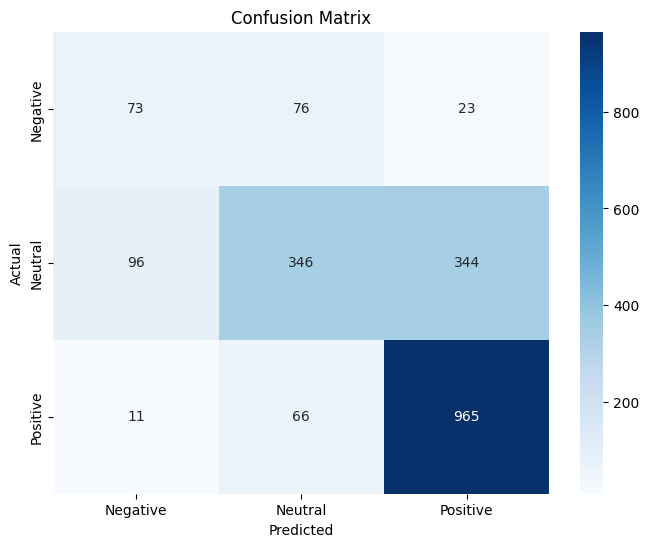


Classification Report:
              precision    recall  f1-score   support

    Negative       0.41      0.42      0.41       172
     Neutral       0.71      0.44      0.54       786
    Positive       0.72      0.93      0.81      1042

    accuracy                           0.69      2000
   macro avg       0.61      0.60      0.59      2000
weighted avg       0.69      0.69      0.67      2000



In [33]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
model.load_state_dict(torch.load('model.pth'))
model.eval()  

print("Model has been loaded successfully!")

model.eval() 
y_true = []
y_pred = []

with torch.no_grad(): 
    for x_batch, y_batch in test_loader:
        outputs = model(x_batch)  
        _, predicted = torch.max(outputs, 1) 
    
        y_true.extend(y_batch.cpu().numpy())  
        y_pred.extend(predicted.cpu().numpy()) 

accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
class_report = classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print("\nClassification Report:")
print(class_report)

In [34]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import os


def clear():
    os.system('clear')

y_pred = []
checkpoint = "mr4/phobert-base-vi-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
phobert_model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
clear()
for input_text in test_data_after_adding_label.Text:
    raw_inputs = [input_text]
    inputs = tokenizer(raw_inputs, padding=True,
                    truncation=True, return_tensors="pt")
    outputs = phobert_model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    
    dict_label = {'Trung tính' : 1,'Tiêu cực':0,'Tích cực':2}
    clear()
    for i, prediction in enumerate(predictions):
        predicted_label_idx = torch.argmax(prediction).item()  # Lấy chỉ số của giá trị lớn nhất
        predicted_label = phobert_model.config.id2label[predicted_label_idx] #Lấy tên class
        y_pred.append(dict_label[predicted_label])



Test Accuracy: 64.25%


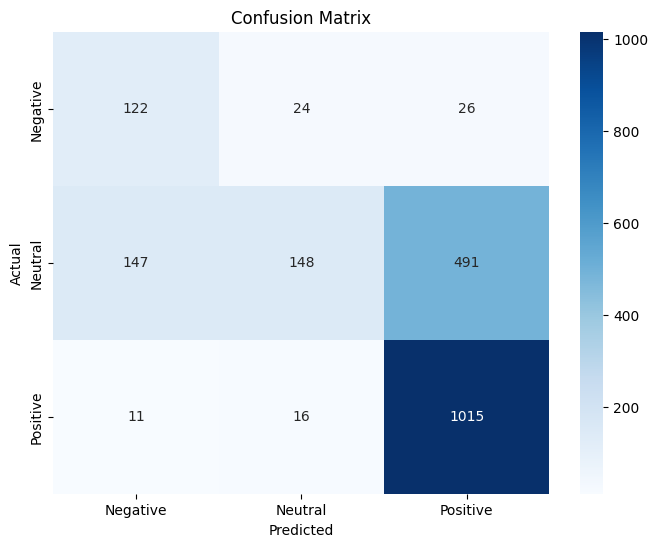

In [35]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Test với 2 mô hình Logistic Regression và Naive Bayes để so sánh với CNN

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler

# Reshape data for scikit-learn (flattening the 3D tensor to 2D)
x_train_reshaped = x_train_vector.reshape(x_train_vector.shape[0], -1)
x_test_reshaped = x_test_vector.reshape(x_test_vector.shape[0], -1)

if torch.is_tensor(x_train_reshaped):
    x_train_reshaped = x_train_reshaped.numpy()
    x_test_reshaped = x_test_reshaped.numpy()
if torch.is_tensor(y_train):
    y_train_np = y_train.numpy()
    y_test_np = y_test.numpy()
else:
    y_train_np = y_train
    y_test_np = y_test

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_test_scaled = scaler.transform(x_test_reshaped)

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(x_train_scaled, y_train_np)
lr_predictions = lr_model.predict(x_test_scaled)
lr_accuracy = accuracy_score(y_test_np, lr_predictions)

# 2. Naive Bayes
x_train_nb = x_train_scaled - x_train_scaled.min()
x_test_nb = x_test_scaled - x_test_scaled.min()

nb_model = MultinomialNB()
nb_model.fit(x_train_nb, y_train_np)
nb_predictions = nb_model.predict(x_test_nb)
nb_accuracy = accuracy_score(y_test_np, nb_predictions)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_np, lr_predictions, 
                          target_names=['Negative', 'Neutral', 'Positive']))

print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_np, nb_predictions, 
                          target_names=['Negative', 'Neutral', 'Positive']))


Logistic Regression Results:
Accuracy: 0.6465

Classification Report:
              precision    recall  f1-score   support

    Negative       0.35      0.38      0.36       172
     Neutral       0.61      0.53      0.57       786
    Positive       0.72      0.78      0.75      1042

    accuracy                           0.65      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.64      0.65      0.64      2000


Multinomial Naive Bayes Results:
Accuracy: 0.4865

Classification Report:
              precision    recall  f1-score   support

    Negative       0.26      0.13      0.17       172
     Neutral       0.44      0.91      0.60       786
    Positive       0.77      0.23      0.35      1042

    accuracy                           0.49      2000
   macro avg       0.49      0.42      0.37      2000
weighted avg       0.60      0.49      0.43      2000



In [15]:
y_train

array([ 0,  0,  1, ...,  0, -1,  1], dtype=int64)

In [17]:
y_test.shape

(2000,)

In [72]:
result_openAI = open('openai_result.txt',encoding='utf-8').readlines()

In [73]:
result_openAI = [r.strip() for r in result_openAI]

In [74]:
len(result_openAI)

2000

In [75]:
final_res_openAI = []

In [76]:
for i in result_openAI:
    if(len(i) > 1):
        if(i.split(':')[1].strip()[0] == '-'):
            final_res_openAI.append(-1)
        else:
            final_res_openAI.append(int(i.split(':')[1].strip()[0]))

In [77]:
final_res_openAI = np.array(final_res_openAI,dtype=np.int64)

In [78]:
final_res_openAI.shape

(2000,)

In [84]:
y_test[:20]

array([ 1,  0,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  0,  1, -1,  1,  1,
        1,  1,  1], dtype=int64)

In [83]:
final_res_openAI[:20]

array([ 1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  0], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [80]:
print(accuracy_score(y_test,final_res_openAI))


0.376


In [86]:
print(classification_report(y_test, final_res_openAI, 
                          target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.12      0.41      0.19       172
     Neutral       0.40      0.34      0.37       786
    Positive       0.56      0.40      0.46      1042

    accuracy                           0.38      2000
   macro avg       0.36      0.38      0.34      2000
weighted avg       0.46      0.38      0.40      2000

